# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The business task of understanding what drives used car prices can be reframed as a **supervised machine learning regression problem**. The target variable is the **price of the car**, while explanatory variables include structured attributes such as **make, model, year, type, transmission, and location**.

The objective is twofold:

1. **Prediction** – build and evaluate models that can accurately estimate the price of a car based on its features.  
2. **Interpretability** – assess the influence of each predictor and explain how these factors influence used car prices.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### Steps to get to know the dataset and identify quality issues:

1. **Load the data**: Read the dataset into a pandas DataFrame for analysis.
2. **Inspect the structure**: Use `.info()`, `.shape`, and `.head()` to understand the number of rows, columns, and data types.
3. **Check for missing values**: Calculate the number and percentage of missing values in each column to identify incomplete data.
4. **Assess duplicates**: Check for duplicate rows that may skew analysis.
5. **Review value distributions**: Use `.value_counts()` and summary statistics to spot outliers, unexpected values, or low cardinality columns.
6. **Visualize missing data**: Plot missing value percentages to quickly identify problematic columns.
7. **Examine categorical and numerical features**: Review unique values and ranges to spot inconsistencies or errors.
8. **Check for inconsistent formats**: Look for mixed data types or formatting issues in columns (e.g., dates, categories).
9. **Document findings**: Note columns with significant missing data, outliers, or other quality concerns for further cleaning and preparation.

#### 1. Load the data

Read the dataset into a pandas DataFrame for analysis.

In [71]:
# 1. Load the data
import pandas as pd
data = pd.read_csv('data/vehicles.csv')
print(data.head())

           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  NaN  NaN         NaN    ar  
2 

## 2. Inspect the structure

Use `.info()`, `.shape`, and `.head()` to understand the number of rows, columns, and data types.

In [72]:
# 2. Inspect the structure
print(data.info())
print(data.shape)
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

## 3. Check for missing values

Calculate the number and percentage of missing values in each column to identify incomplete data.

In [73]:
# 3. Check for missing values
missing_counts = data.isnull().sum()
missing_percent = data.isnull().mean() * 100
print('Missing values per column:')
print(missing_counts)
print('Percentage of missing values per column:')
print(missing_percent)

Missing values per column:
id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64
Percentage of missing values per column:
id               0.000000
region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model            1.236179
condition       40.785232
cylinders       41.622470
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
VIN             37.725356
drive           30.586347
size            71.767476
type            21.752717
paint_color     30.501078
state            0.000000
dtype: float64


## 4. Assess duplicates

Check for duplicate rows that may skew analysis.

In [74]:
# 4. Assess duplicates
duplicate_count = data.duplicated().sum()
print(f'Duplicate rows: {duplicate_count}')

Duplicate rows: 0


## 5. Review value distributions

Use `.value_counts()` and summary statistics to spot outliers, unexpected values, or low cardinality columns.

In [75]:
# 5. Review value distributions
for col in data.columns:
    print(f'Value counts for {col}:')
    print(data[col].value_counts(dropna=False))
    print('-' * 40)
print('Summary statistics:')
print(data.describe(include='all'))

Value counts for id:
id
7222695916    1
7313139418    1
7313423023    1
7313423324    1
7313424533    1
             ..
7314655506    1
7314655833    1
7314657468    1
7314659947    1
7301591129    1
Name: count, Length: 426880, dtype: int64
----------------------------------------
Value counts for region:
region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: count, Length: 404, dtype: int64
----------------------------------------
Value counts for price:
price
0        32895
6995      3169
7995      3129
9995      2867
8995      2837
         ...  
21298        1
49217        1
63195        1
19709        1
17873        1
Name: count, Length: 15655, dtype: int64
-----------------

## 6. Visualize missing data

Plot missing value percentages to quickly identify problematic columns.

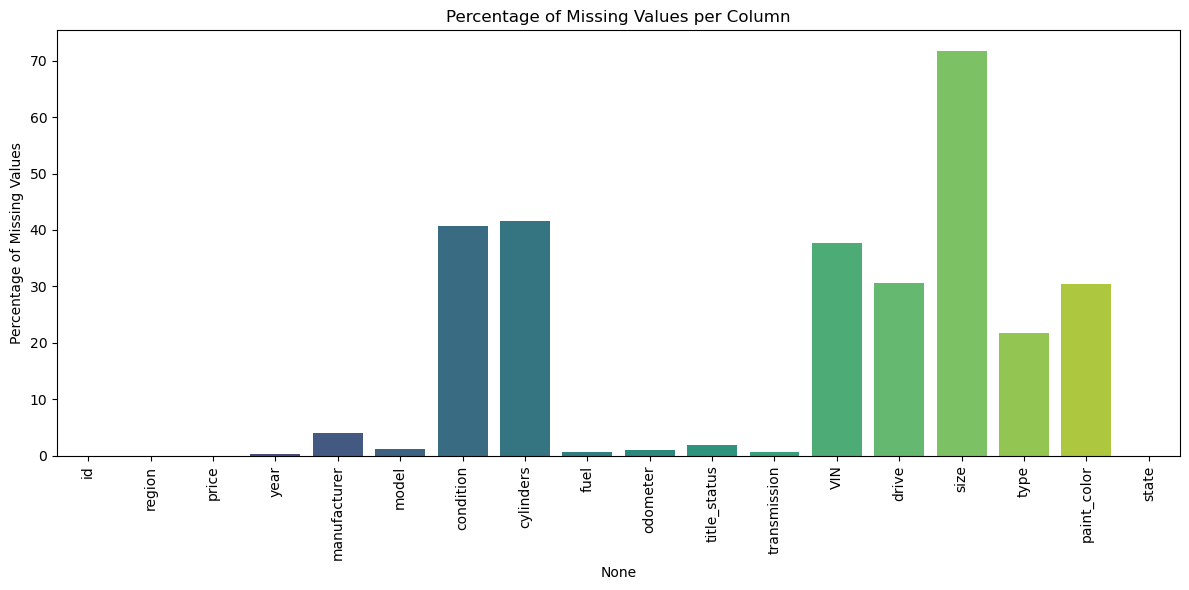

In [76]:
# 6. Visualize missing data
import matplotlib.pyplot as plt
import seaborn as sns
missing_percent = data.isnull().mean() * 100
plt.figure(figsize=(12,6))
sns.barplot(x=missing_percent.index, y=missing_percent.values, palette='viridis')
plt.xticks(rotation=90)
plt.ylabel('Percentage of Missing Values')
plt.title('Percentage of Missing Values per Column')
plt.tight_layout()
plt.show()

## 7. Examine categorical and numerical features

Review unique values and ranges to spot inconsistencies or errors.

In [77]:
# 7. Examine categorical and numerical features
for col in data.select_dtypes(include=['object']).columns:
    print(f'Unique values in {col}:')
    print(data[col].unique())
    print('-' * 40)
for col in data.select_dtypes(include=['number']).columns:
    print(f'Range for {col}: min={data[col].min()}, max={data[col].max()}')
    print('-' * 40)

Unique values in region:
['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san luis obispo' 'santa barbara' 'santa maria' 'SF bay area'
 'siskiyou county' 'stockton' 'susanville' 'ventura county'
 'visalia-tulare' 'yuba-sutter' 'boulder' 

## 8. Check for inconsistent formats

Look for mixed data types or formatting issues in columns (e.g., dates, categories).
cell_type
id
metadata

In [78]:
# 9. Document findings
problematic_columns = missing_percent[missing_percent > 20].index.tolist()
print('Columns with >20% missing data:', problematic_columns)
print('You can add notes or save findings for further cleaning')

Columns with >20% missing data: ['condition', 'cylinders', 'VIN', 'drive', 'size', 'type', 'paint_color']
You can add notes or save findings for further cleaning


In [79]:
# 8. Check for inconsistent formats
for col in data.columns:
    if data[col].dtype == 'object':
        sample_values = data[col].dropna().astype(str).head(10)
        print(f'Sample values for {col}:')
        print(sample_values)
        print('-' * 40)

Sample values for region:
0                  prescott
1              fayetteville
2              florida keys
3    worcester / central MA
4                greensboro
5             hudson valley
6             hudson valley
7             hudson valley
8           medford-ashland
9                      erie
Name: region, dtype: object
----------------------------------------
Sample values for manufacturer:
27          gmc
28    chevrolet
29    chevrolet
30       toyota
31         ford
32          gmc
33    chevrolet
34       toyota
35    chevrolet
36    chevrolet
Name: manufacturer, dtype: object
----------------------------------------
Sample values for model:
27       sierra 1500 crew cab slt
28                 silverado 1500
29            silverado 1500 crew
30           tundra double cab sr
31                      f-150 xlt
32    sierra 2500 hd extended cab
33          silverado 1500 double
34                         tacoma
35          colorado extended cab
36           corvette grand